## Introduction to Linear Programming with Python

### What is [Linear Programming (LP)](https://en.wikipedia.org/wiki/Linear_programming)?

A linear program is a mathematical optimization model that has a linear objective function and a set of linear constraints. It is simple yet a very powerful tool to enable mathematical decision making under constraints. 

- **Understand the problem** :) 
- **Define decision variables**: our choices that are under our control, the unknowns of our problem.
- **Define objective & objective function**: a criterion that we wish to minimize (e.g., cost) or maximize (e.g., profit)
- **Define constraints**: the limitations that restrict our choices for decision variables.

Any LP problem with 2 variables can be solved graphically by plotting the constraint equations and narrowing down the feasible region to find the optimum values of the decision variables..

<img src="images/feasible_region.png" alt="feasible_reg" style="width: 300px;" />

A lot of situations we come across in everyday life have processes that follow linear relationships with several day to day factors. As such, linear programming finds in application in many unique ways and in different domains of science and technology such as routing and logistics, financial planning, manufacturing, product mix etc. 

Here in this notebook we will see an introduction to linear programming, how to use LP framework in Python using [PuLP](https://pythonhosted.org/PuLP/) by giving simple examples and a real life example of optimizing everyday life. 

Once we properly translate the problem with algebraic expressions, we can find solutions to relevant everyday problems. 



In [1]:
import sys
print("Python version: ", sys.version[:5])

Python version:  3.7.0


In [2]:
! pip freeze | grep PuLP
! pip freeze | grep pandas
! pip freeze | grep numpy
! pip freeze | grep seaborn
! pip freeze | grep matplotlib

PuLP==1.6.10
pandas==0.23.4
numpy==1.15.2
seaborn==0.9.0
matplotlib==3.0.0


In [3]:
# ! pip install pulp
# ! pip install 
# ! pip install unidecode

In [4]:
from pulp import *
import pandas as pd

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import unidecode
import re

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)
plt.rcParams['figure.figsize'] = (12, 6)

### Let's start with a simple example: 

You are taking a test in which items of type A are worth 10 points and items of type B are worth 15 points. 
It takes 3 minutes for each item of type A and 6 minutes for each item of type B. 
Total time allowed is 60 minutes, and you may not answer more than 16 questions. 
Assuming all your answers are correct, 
how many items of each type should you answer in order to get the best score?

<img src="images/test.jpg" alt="test" style="width: 900px;" />

#### Solution with using PuLP :

In [5]:
#define variables
x1 = LpVariable('x1', lowBound=0, cat='Integer') # number of type A questions
x2 = LpVariable('x2', lowBound=0, cat='Integer') # number of type B questions

#objective & objective function
prob = LpProblem("test", LpMaximize) 
prob += 10*x1+15*x2 

#these are constraints and not an objective as there is a equality/inequality
prob += 3*x1+6*x2 <= 60
prob += x1+x2 <= 16

prob.writeLP("test.lp")
print(prob)

test:
MAXIMIZE
10*x1 + 15*x2 + 0
SUBJECT TO
_C1: 3 x1 + 6 x2 <= 60

_C2: x1 + x2 <= 16

VARIABLES
0 <= x1 Integer
0 <= x2 Integer



In [6]:
print(prob.variables())
print(prob.objective)
print(prob.constraints)

# print(LpStatus)
print(LpStatus[prob.status])

print(x1.name, "=", x1.varValue)
print(x2.name, "=", x2.varValue)
print(x1.cat, x2.cat)

print(value(prob.objective))

[x1, x2]
10*x1 + 15*x2
OrderedDict([('_C1', 3*x1 + 6*x2 + -60 <= 0), ('_C2', 1*x1 + 1*x2 + -16 <= 0)])
Not Solved
x1 = None
x2 = None
Integer Integer
None


In [7]:
#solve
prob.solve()

print("Status:", LpStatus[prob.status])

print ("\nIndividual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
print ("\nValue of the obj function: ")
print(value(prob.objective))

Status: Optimal

Individual decision_variables: 
x1 = 12.0
x2 = 4.0

Value of the obj function: 
180.0


### Example 2: Giapetto

<img src="images/giapetto.jpeg" alt="giapetto" style="width: 300px;" />

Giapetto, Inc. manufactures wooden toys and tables for kids. The manufacturer wants to maximize their weekly profit. \\$20 of profit per wooden toy and \\$30 of profit per table. A toy requires 1 hour of finishing labor and 2 hours of carpentry labor. A table requires 2 hours of finishing labor and 1 hour of carpentry labor. 
Each week, Giapetto has only 100 finishing hours and 100 carpentry hours available. 

In [8]:
x1 = LpVariable("x1", lowBound=0) # Create a variable x1 >= 0
x2 = LpVariable("x2", lowBound=0) # Create another variable x2 >= 0

prob = LpProblem("giapetto", LpMaximize)  # Create a LP maximization problem

prob += 20*x1 + 30*x2  # Objective function

prob += 1*x1 + 2*x2 <= 100  # Finishing hours - constraint #1
prob += 2*x1 + 1*x2 <= 100  # Carpentry hours - constraint #2

prob.writeLP("giapetto.lp")
print(prob)  # Display the LP problem

giapetto:
MAXIMIZE
20*x1 + 30*x2 + 0
SUBJECT TO
_C1: x1 + 2 x2 <= 100

_C2: 2 x1 + x2 <= 100

VARIABLES
x1 Continuous
x2 Continuous



In [9]:
#solve
prob.solve()

print("Status:", LpStatus[prob.status])

print ("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
print ("Value of the obj function: ")
print(value(prob.objective))

Status: Optimal
Individual decision_variables: 
x1 = 33.333333
x2 = 33.333333
Value of the obj function: 
1666.6666500000001


#### Integer Linear Programming (ILP)

In [10]:
x1 = LpVariable("x1", lowBound=0, cat='Integer') # Create a variable x1 >= 0
x2 = LpVariable("x2", lowBound=0, cat='Integer') # Create another variable x2 >= 0

prob = LpProblem("giapetto2", LpMaximize)  # Create a LP maximization problem

prob += 20*x1 + 30*x2  # Objective function

prob += 1*x1 + 2*x2 <= 100  # Finishing hours - constraint #1
prob += 2*x1 + 1*x2 <= 100  # Carpentry hours - constraint #2

prob.writeLP("giapetto2.lp")
print(prob) #Display the LP problem

giapetto2:
MAXIMIZE
20*x1 + 30*x2 + 0
SUBJECT TO
_C1: x1 + 2 x2 <= 100

_C2: 2 x1 + x2 <= 100

VARIABLES
0 <= x1 Integer
0 <= x2 Integer



In [11]:
#solve
prob.solve()

print("Status:", LpStatus[prob.status])

print ("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
print ("Value of the obj function: ")
print(value(prob.objective))

Status: Optimal
Individual decision_variables: 
x1 = 32.0
x2 = 34.0
Value of the obj function: 
1660.0


### Example 3: Snack Bar

<img src="images/snack.png" alt="snack" style="width: 200px;" />

A snack bar cooks and sells hamburgers and hot dogs during football games. To stay in business it must sell at least 10 hamburgers but cannot cook more than 40. It must also sell at least 30 hot dogs but cannot cook more than 70. It cannot cook more than 90 sandwiches all together. The profit on a hamburger is \\$0.33 and \\$0.21 on a hot dog. How many of each kind of sandwich should the stand sell to make the maximum profit?

In [12]:
#define variables
x = LpVariable('x', lowBound=10, upBound=40, cat='Integer') # number of hamburgers
y = LpVariable('y', lowBound=30, upBound=70, cat='Integer') # number of hotdogs 

#objective & objective function
prob = LpProblem("snack", LpMaximize) 
prob += 0.33*x+0.21*y

#constraints 
# prob += x <= 40
# prob += x >= 10
# prob += x <= 70
# prob += x >= 30
prob += x+y <= 90

prob.writeLP("snack.lp")
print(prob)

snack:
MAXIMIZE
0.33*x + 0.21*y + 0.0
SUBJECT TO
_C1: x + y <= 90

VARIABLES
10 <= x <= 40 Integer
30 <= y <= 70 Integer



In [13]:
#solve
prob.solve()

print("Status:", LpStatus[prob.status])

print ("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
print ("Value of the obj function: ")
print(value(prob.objective))

Status: Optimal
Individual decision_variables: 
x = 40.0
y = 50.0
Value of the obj function: 
23.700000000000003


### Example 4: Cookies

<img src="images/cookie.gif" alt="snack" style="width: 400px;" />

Sylvee is going to bake some cookies for next Women Who Code event :) 
She will make two different kinds, oatmeal-raisin and
chocolate chip. It will cost \\$1.70 to bake a dozen oatmeal-raisin cookies 
and \\$1.20 per dozen for chocolate chip cookies. The number of chocolate chip cookies must
be at least twice the number of oatmeal-raisin cookies. She
will bake at least six dozen cookies total, with no more
than five dozen chocolate chip.
What is the minimum cost to bake the cookies? 
How many dozens of each kind will she be able to bake for that cost? 

In [14]:
#define variables
x = LpVariable('x', cat='Integer') # number of chocolate chip
y = LpVariable('y', cat='Integer') # number of oatmeal-raisin 

#objective & objective function
prob = LpProblem('cookie', LpMinimize) 
prob += 1.20*x+1.70*y

#constraints 
prob += x >= 2*y
prob += x + y >= 6
prob += x <= 5 


prob.writeLP("cookie.lp")
print(prob)


#solve
prob.solve()

print("Status:", LpStatus[prob.status])

print ("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
print ("Value of the obj function: ")
print(value(prob.objective))

cookie:
MINIMIZE
1.2*x + 1.7*y + 0.0
SUBJECT TO
_C1: x - 2 y >= 0

_C2: x + y >= 6

_C3: x <= 5

VARIABLES
x free Integer
y free Integer

Status: Optimal
Individual decision_variables: 
x = 5.0
y = 1.0
Value of the obj function: 
7.7


### Find the Recipes! 😋


Here in this section, we will use [Epicurious](https://www.epicurious.com/) recipes dataset that is available on [Kaggle](https://www.kaggle.com/hugodarwood/epirecipes/version/2)
    
<table><tr>
<td> <img src="images/epicurious.png" alt="epi" style="width: 300px;"/> </td>
<td> <img src="images/kaggle-logo.png" alt="kaggle" style="width: 300px;"/> </td>
</tr></table>


I cleaned the dataset a little bit and we will use a subset of that to find recipes that satisfies our macronutrient requirements we define.

**Problem**: We would like to have a x number of 5-star recipes that maximize our protein intake while keeping sodium and calorie intake below a certain level. 

In [15]:
data = pd.read_csv('data.csv')

In [16]:
# first 5 rows of data
print("\n First 5 rows: ")
display(data.head())

# size of the dataset
print("Number of rows:", data.shape[0]) 
print("Number of columns: ", data.shape[1])

# checking data types in each column
print("\n Data Types: ")
print(data.dtypes)

# checking missing values across dataset
print("\n Missing Values: ")
print(data.isna().sum())

# summary statistics
print("\n Summary Statistics:")
display(data.describe())


 First 5 rows: 


,title,rating,calories,protein,fat,sodium
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0
3,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0
4,The Best Blts,4.375,948.0,19.0,79.0,1042.0


Number of rows: 13431
Number of columns:  6

 Data Types: 
title        object
rating      float64
calories    float64
protein     float64
fat         float64
sodium      float64
dtype: object

 Missing Values: 
title       0
rating      0
calories    0
protein     0
fat         0
sodium      0
dtype: int64

 Summary Statistics:


,rating,calories,protein,fat,sodium
count,13431.000,13431.000,13431.000,13431.000,13431.000
mean,3.768,437.782,18.393,24.640,458.111
std,1.257,345.851,24.565,25.702,494.978
min,0.000,0.000,0.000,0.000,0.000
25%,3.750,205.000,3.000,8.000,86.000
50%,4.375,338.000,8.000,18.000,288.000
75%,4.375,572.000,26.000,32.000,663.000
max,5.000,2484.000,384.000,246.000,2498.000


In [19]:
data.rating.value_counts().sort_index()

0.000    1038
1.250     104
1.875      66
2.500     357
3.125    1007
3.750    3569
4.375    5624
5.000    1666
Name: rating, dtype: int64

Take 5-Star recipes and exclude relatively high sodium and calorie ones to create the candidate recipes to choose from:

In [20]:
five_star = data[data['rating'] == 5]

print('We have {:,} 5-star recipes'.format(len(five_star)))

We have 1,666 5-star recipes


In [21]:
a = pd.qcut(five_star['calories'], [0,.33,.66,1], labels=['low','med','high']).rename('cal_class')
b = pd.qcut(five_star['sodium'], [0,.33,.66,1], labels=['low','med','high']).rename('sod_class')

five_star = five_star.join(a).join(b)

In [22]:
five_star.head()

,title,rating,calories,protein,fat,sodium,cal_class,sod_class
14,Mozzarella-Topped Peppers with Tomatoes and Ga...,5.0,107.0,5.0,7.0,344.0,low,med
15,"Tuna, Asparagus, and New Potato Salad with Chi...",5.0,421.0,10.0,33.0,383.0,med,med
37,Pancetta Roast Chicken with Walnut Stuffing,5.0,1203.0,89.0,87.0,583.0,high,high
45,Southwest Corn Bread Stuffing with Corn and Gr...,5.0,293.0,7.0,15.0,565.0,med,high
64,Jeweled Rice,5.0,517.0,7.0,18.0,20.0,high,low


rating        calories        protein            fat         \
            mean median     mean median    mean median    mean median   
cal_class                                                               
low          5.0    5.0  144.817  155.0   3.147    2.0   6.040    4.0   
med          5.0    5.0  318.228  305.5   8.912    6.0  15.965   16.0   
high         5.0    5.0  800.217  693.5  36.680   28.0  49.475   40.0   

            sodium         
              mean median  
cal_class                  
low        215.085   67.0  
med        317.489  213.5  
high       754.477  615.0

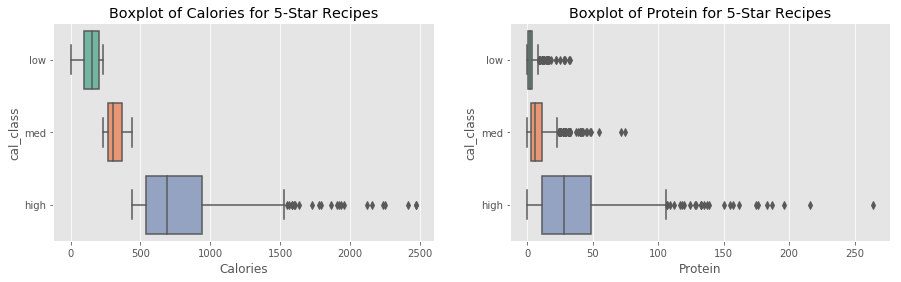

In [33]:
display(five_star.groupby('cal_class').agg([np.mean, np.median]))

fig,ax = plt.subplots(1,2,figsize = (15,4)) 

sns.boxplot(y="cal_class", x="calories", data=five_star, ax=ax[0], palette="Set2");
ax[0].set_title("Boxplot of Calories for 5-Star Recipes");
ax[0].set_xlabel('Calories');

sns.boxplot(y="cal_class", x="protein", data=five_star, ax=ax[1], palette="Set2");
ax[1].set_title("Boxplot of Protein for 5-Star Recipes");
ax[1].set_xlabel('Protein');

rating        calories        protein            fat         \
            mean median     mean median    mean median    mean median   
sod_class                                                               
low          5.0    5.0  238.931  215.0   2.935    2.0   8.629    3.0   
med          5.0    5.0  401.438  318.0  12.100    7.0  24.725   18.0   
high         5.0    5.0  627.293  540.0  33.769   23.5  38.412   31.0   

             sodium         
               mean median  
sod_class                   
low          30.469   20.0  
med         247.224  231.0  
high       1001.792  889.0

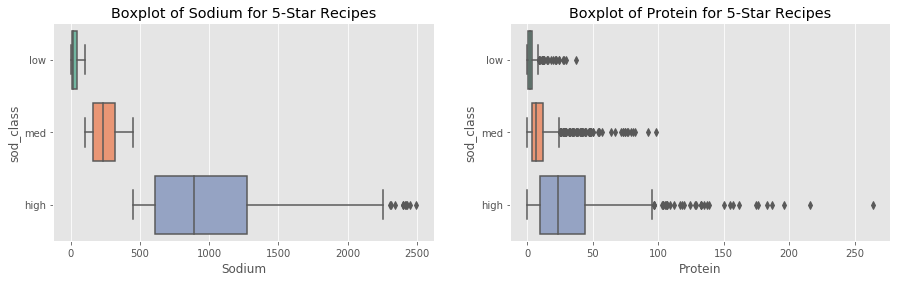

In [32]:
display(five_star.groupby('sod_class').agg([np.mean, np.median]))

fig,ax = plt.subplots(1,2,figsize = (15,4)) 

sns.boxplot(y="sod_class", x="sodium", data=five_star, ax=ax[0], palette="Set2");
ax[0].set_title("Boxplot of Sodium for 5-Star Recipes");
ax[0].set_xlabel('Sodium');

sns.boxplot(y="sod_class", x="protein", data=five_star, ax=ax[1], palette="Set2");
ax[1].set_title("Boxplot of Protein for 5-Star Recipes");
ax[1].set_xlabel('Protein');

In [34]:
recipe_pool = five_star[(five_star['sod_class'] != 'high') & (five_star['cal_class'] != 'high')]

print('When we exclude high sodium and high calorie ones, there are {:,} 5-star recipes to choose from'.format(len(recipe_pool)))


When we exclude high sodium and high calorie ones, there are 883 5-star recipes to choose from


In [35]:
recipe_pool.title.value_counts().sort_values(ascending=False).head()

Charred Padrón Chiles and Squid Salad          1
Smoked Caviar and Hummus on Pita Toasts        1
Hot Milk Cakes with Strawberries and Cream     1
Whole Grain Mustard Aïoli                      1
Hamburger Soup                                 1
Name: title, dtype: int64

In [36]:
recipe_pool.head()

,title,rating,calories,protein,fat,sodium,cal_class,sod_class
14,Mozzarella-Topped Peppers with Tomatoes and Ga...,5.0,107.0,5.0,7.0,344.0,low,med
15,"Tuna, Asparagus, and New Potato Salad with Chi...",5.0,421.0,10.0,33.0,383.0,med,med
81,Apricot-Pistachio Muffins Baked on the Grill,5.0,247.0,5.0,10.0,185.0,med,med
89,Tropical Rum Punch,5.0,230.0,1.0,0.0,26.0,low,low
98,Pastry Dough,5.0,234.0,3.0,16.0,99.0,med,low


Some text manipulation:

In [39]:
df = recipe_pool.copy()

df['title'] = df['title'].map(lambda x: unidecode.unidecode(x).lower())

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, " ")
    return text

df['title'] = df['title'].apply(remove_punctuations)
df['title'] = df['title'].map(lambda x: re.sub("\s\s+" , " ", x.strip()))

In [40]:
df.title.value_counts().sort_values(ascending=False).head()

sour cream ice cream                               2
cafe brulot                                        2
strawberry rhubarb compote with ginger and lime    1
grape and walnut sweet focaccia                    1
bee s knees                                        1
Name: title, dtype: int64

Variable names should be all unique!

In [41]:
df.drop_duplicates('title' ,inplace=True)

In [42]:
print(df.shape)
df.head()

(881, 8)


,title,rating,calories,protein,fat,sodium,cal_class,sod_class
14,mozzarella topped peppers with tomatoes and ga...,5.0,107.0,5.0,7.0,344.0,low,med
15,tuna asparagus and new potato salad with chive...,5.0,421.0,10.0,33.0,383.0,med,med
81,apricot pistachio muffins baked on the grill,5.0,247.0,5.0,10.0,185.0,med,med
89,tropical rum punch,5.0,230.0,1.0,0.0,26.0,low,low
98,pastry dough,5.0,234.0,3.0,16.0,99.0,med,low


### Setting up the LP Problem:

Let's initialize the problem with the objective:

In [43]:
lp_model = pulp.LpProblem('The Diet Problem', pulp.LpMaximize)

In [44]:
recipes = df['title'].tolist()
calories = df['calories'].tolist()
protein = df['protein'].tolist()
sodium = df['sodium'].tolist()

In [ ]:
# recipes

Identify variables: 

In [45]:
# Creates a dictionary of LP variables
# This function creates a dictionary of LP Variables with the specified associated parameters.

x = pulp.LpVariable.dict('x_%s', recipes, lowBound=0, upBound = 1, cat='Binary')

print(type(x))
# print(x)

<class 'dict'>


In [46]:
# for key,value in x.items():
#         print(value)

In [47]:
print('Number of variables: ', len(x.values()))

Number of variables:  881


In [48]:
x.get('breakfast bowl with quinoa and berries')

x_breakfast_bowl_with_quinoa_and_berries

In [49]:
cal = dict(zip(recipes, calories))
prot = dict(zip(recipes, protein))
sod = dict(zip(recipes, sodium))

In [50]:
# prot

In [51]:
print(cal.get('breakfast bowl with quinoa and berries'))
print(prot.get('breakfast bowl with quinoa and berries'))
print(sod.get('breakfast bowl with quinoa and berries'))

173.0
5.0
3.0


In [52]:
# add objective function to the model - maximize total protein intake
lp_model += sum([prot[i] * x[i] for i in recipes]) 

In [53]:
#constraints
lp_model += sum([cal[i]*x[i] for i in recipes]) <= 2000 # keep total cal <= 2000 kcal
lp_model += sum([sod[i]*x[i] for i in recipes]) <= 1500 # keep total sod <= 1500 mg
lp_model += sum([x[i] for i in x.keys()]) <= 4 # return 4 or less recipes 

In [54]:
print(lp_model)
lp_model.writeLP("find_recipes.lp")

The Diet Problem:
MAXIMIZE
2.0*x_3_ingredient_caramel_pear_galette + 3.0*x_3_ingredient_peanut_butter_cookies + 3.0*x_all_butter_pie_dough + 4.0*x_almond_and_chocolate_dacquoise_with_cranberry_sauce + 5.0*x_almond_ice_cream_terrine_with_chocolate_truffles_and_raspberry_sauce + 2.0*x_ancho_chile_sauce + 8.0*x_angel_hair_with_lemon_kale_and_pecans + 1.0*x_apple_and_blackberry_sorbet + 5.0*x_apple_and_fig_custard + 2.0*x_apple_and_tart_cherry_pie + 4.0*x_apple_fritters_with_bourbon_ice_cream + 2.0*x_apple_ginger_chutney + 4.0*x_apple_pie_with_walnut_streusel + 5.0*x_apricot_berry_trifle + 3.0*x_apricot_miso_jam + 5.0*x_apricot_pistachio_muffins_baked_on_the_grill + 1.0*x_arugula_endive_and_fennel_salad_with_chunky_olive_vinaigrette + 2.0*x_asian_fruit_salad_with_papaya_mint_sauce + 2.0*x_asian_pear_and_frisee_salad + 3.0*x_aunt_holly_s_banana_bread + 3.0*x_aunt_tom_s_italian_cream_cake + 8.0*x_austrian_crepes + 2.0*x_avocado_salsa + 1.0*x_baguette_toasts + 1.0*x_baharat_seasoning + 2.0*x_

In [55]:
#solve
lp_model.solve()

print("Status:", LpStatus[lp_model.status])
print ("Individual decision_variables: ")
for v in lp_model.variables():
    print(v.name, "=", v.varValue)

Status: Optimal
Individual decision_variables: 
x_3_ingredient_caramel_pear_galette = 0.0
x_3_ingredient_peanut_butter_cookies = 0.0
x_all_butter_pie_dough = 0.0
x_almond_and_chocolate_dacquoise_with_cranberry_sauce = 0.0
x_almond_ice_cream_terrine_with_chocolate_truffles_and_raspberry_sauce = 0.0
x_amaretto_mimosa = 0.0
x_ancho_chile_sauce = 0.0
x_angel_hair_with_lemon_kale_and_pecans = 0.0
x_apple_and_blackberry_sorbet = 0.0
x_apple_and_fig_custard = 0.0
x_apple_and_tart_cherry_pie = 0.0
x_apple_fritters_with_bourbon_ice_cream = 0.0
x_apple_ginger_chutney = 0.0
x_apple_pie_with_walnut_streusel = 0.0
x_apricot_berry_trifle = 0.0
x_apricot_miso_jam = 0.0
x_apricot_pistachio_muffins_baked_on_the_grill = 0.0
x_artillery_punch = 0.0
x_arugula_endive_and_fennel_salad_with_chunky_olive_vinaigrette = 0.0
x_asian_fruit_salad_with_papaya_mint_sauce = 0.0
x_asian_pear_and_frisee_salad = 0.0
x_aunt_holly_s_banana_bread = 0.0
x_aunt_tom_s_italian_cream_cake = 0.0
x_austrian_crepes = 0.0
x_avocado

x_sweet_and_tart_cranberry_sauce = 0.0
x_sweet_chutney = 0.0
x_sweet_corn_ice_cream_with_butterscotch = 0.0
x_sweet_potato_bread_with_caramel_and_aleppo_spiced_pecans = 0.0
x_sweet_potato_miso_pie_with_chocolate_sesame_crust = 0.0
x_sweet_potato_streusel = 0.0
x_tahini_sauce = 0.0
x_tandoori_spice_blend = 0.0
x_tartar_sauce = 0.0
x_tequila_and_lime_chicken_tacos = 0.0
x_tequila_sunrise = 0.0
x_teriyaki_salmon = 0.0
x_thai_style_iced_tea = 0.0
x_the_last_word = 0.0
x_the_new_york_sour = 0.0
x_thin_apple_tarts = 0.0
x_three_berry_pie_with_vanilla_cream = 0.0
x_three_peas_with_barley_chile_green_garlic = 0.0
x_thyme_garlic_butter = 0.0
x_tiramisu_affogato = 0.0
x_to_clarify_butter = 0.0
x_toasted_baguette_crumbs = 0.0
x_toasted_salted_pumpkin_seeds = 0.0
x_toffee_sauce = 0.0
x_tomales_bay_oysters_rockefellar = 0.0
x_tomatillo_salsa_with_serranos = 0.0
x_tomato_and_cannellini_bean_soup = 0.0
x_tomato_fennel_and_watercress_salad_with_fennel_tarragon_vinaigrette = 0.0
x_tomato_onion_chutney 

☝️This way is hard to read. Let's put the output into a pandas dataframe:

In [56]:
variable_name = []
variable_value = []

for v in lp_model.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)

df2 = pd.DataFrame({'title': variable_name, 'decision': variable_value})

In [57]:
display(df2.head())
display(df.head())

,title,decision
0,x_3_ingredient_caramel_pear_galette,0.0
1,x_3_ingredient_peanut_butter_cookies,0.0
2,x_all_butter_pie_dough,0.0
3,x_almond_and_chocolate_dacquoise_with_cranberr...,0.0
4,x_almond_ice_cream_terrine_with_chocolate_truf...,0.0


,title,rating,calories,protein,fat,sodium,cal_class,sod_class
14,mozzarella topped peppers with tomatoes and ga...,5.0,107.0,5.0,7.0,344.0,low,med
15,tuna asparagus and new potato salad with chive...,5.0,421.0,10.0,33.0,383.0,med,med
81,apricot pistachio muffins baked on the grill,5.0,247.0,5.0,10.0,185.0,med,med
89,tropical rum punch,5.0,230.0,1.0,0.0,26.0,low,low
98,pastry dough,5.0,234.0,3.0,16.0,99.0,med,low


In [ ]:
# more text cleaning to merge dataframes 
df2['title'] = df2['title'].str[2:].str.replace('_', ' ').str.strip()

In [ ]:
df2.head()

In [ ]:
m = pd.merge(df2, df, how='left', on='title')

In [ ]:
print(m.shape)
print(df.shape)
print(df2.shape)
m.head()

In [ ]:
m[m['decision'] == 1]

In [ ]:
print("Total Protein Intake: ", m[m['decision'] == 1].protein.sum(), ' grams')
print("Total Calories Intake: ", m[m['decision'] == 1].calories.sum(), ' kcal')
print("Total Sodium Intake: ", m[m['decision'] == 1].sodium.sum(), ' miligrams')

<img src="images/thatsallfolks.gif" alt="all" style="width: 300px;" />

## Keep Calm and Optimize On 🤓 

### Thank you! ❤️